# Isolation Forest and Local Outlier Factor

## Summary
This documentation will give detailed decription of using two methods to do outlier detection

## Questions to be answered
- [Dead End] Does X predict Z?
- Does Y correlate with Z?

### Imports
Imports should be grouped in the following order:
1. Magics

2. Alphabetical order
    
    A. standard librarby imports
    
    B. related 3rd party imports
    
    C. local application/library specific imports

In [1]:
# Magics
%matplotlib inline
# Do below if you want interactive matplotlib plot ()
# %matplotlib notebook

# Reload modules before executing user code
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Show version information for dependency modules
# https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 3.5.2 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.1.0
OS Windows 7 6.1.7601 SP1
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
pandas 0.18.1
Fri Dec 09 12:30:11 2016 W. Europe Standard Time

In [6]:
# Standard library
import os
import sys
# sys.path.append('../src/')

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager
import seaborn as sns

# Local imports

In [2]:
# Customizations
sns.set() # matplotlib defaults

# Any tweaks that normally go in .matplotlibrc, etc., should be explicitly stated here
plt.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

### Load data

#### References
References to any data sources.

In [3]:
df = pd.read_pickle('../data/wss_all')

In [4]:
df = df.dropna(axis=0, how='any').reset_index(drop = True)

In [8]:
df_i = df[['mean', 'max', 'std', 'kurt', 'skew', 'dif_mean', 'dif_max',
       'dif_std', 'NA_ratio', 'NA_ratio_dif']]

In [13]:
clf = LocalOutlierFactor(n_neighbors=35, contamination = 0.2)
y_pred = clf.fit_predict(df_i.values)

In [14]:
df1 = df
df1['outlier'] = y_pred

In [15]:
df1[df1['outlier'] == -1]

,itapudid,mean,max,std,kurt,skew,dif_mean,dif_max,dif_std,NA_ratio,NA_ratio_dif,ebs_mfg,outlier
8,163540024001DC915C992,5.992764,85.0,11.335159,19.196668,3.779531,-0.009804,45.0,2.113190,0.005109,0.000000,Knorr Bremse,-1
19,163910058001DC924D4A6,5.823218,85.0,12.102493,20.826158,4.108861,0.014820,45.0,1.272451,0.004216,0.000000,Knorr Bremse,-1
28,164320019001DC924D9AA,151.220000,250.0,97.830980,-1.287947,-0.673190,-0.200000,156.0,63.667824,0.019608,0.000000,Haldex,-1
29,164320023001DC924D914,75.666667,248.0,117.972313,-1.545803,1.023061,-14.000000,0.0,24.248711,0.250000,0.000000,Haldex,-1
35,164720004001DC915D676,134.985294,250.0,104.918168,-1.687278,-0.399897,-7.264706,150.0,36.112435,0.042254,0.000000,Haldex,-1
38,164720012001DC915AADE,102.684211,248.0,107.143023,-1.925626,0.152583,9.789474,206.0,52.935578,0.000000,0.000000,Haldex,-1
39,164720013001DC915CE66,122.038462,250.0,105.235862,-1.822925,-0.125419,-9.615385,248.0,73.660886,0.257143,0.000000,Haldex,-1
43,164720029001DC924D35C,148.000000,248.0,100.765073,-1.365222,-0.729467,-18.000000,6.0,37.690469,0.200000,0.000000,Haldex,-1
44,164720034001DC92CBB42,140.400000,248.0,121.913631,-2.237341,-0.423312,0.000000,42.0,29.698485,0.166667,0.000000,Haldex,-1
45,164720036001DC92CBBC9,140.937500,248.0,102.571548,-1.539985,-0.495342,-5.541667,98.0,50.132148,0.040000,0.000000,Haldex,-1


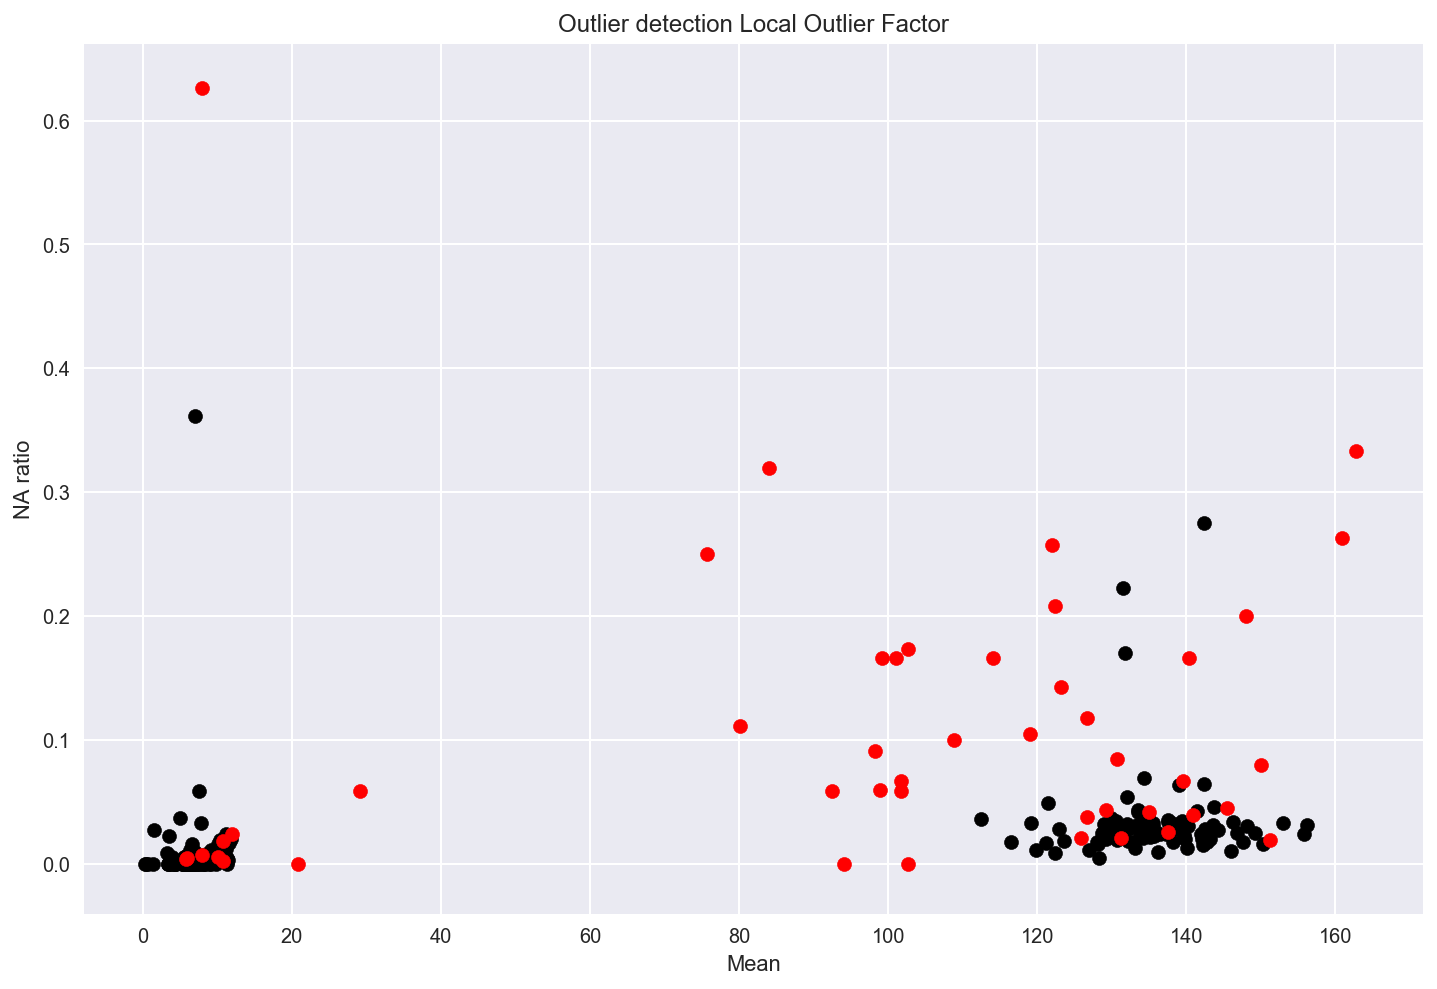

In [16]:
df1_1 = df1[df1['outlier'] == 1][['mean','NA_ratio']]
X1 = df1_1.values
df1_2 = df1[df1['outlier'] == -1][['mean','NA_ratio']]
X2 = df1_2.values
plt.figure(1) 
plt.title("Outlier detection Local Outlier Factor")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.ylabel("NA ratio")
plt.xlabel("Mean")
plt.show()

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(df_i.values)

In [18]:
clf = LocalOutlierFactor(n_neighbors=35, contamination = 0.2)
y_pred = clf.fit_predict(rescaledX)
df1 = df
df1['outlier'] = y_pred

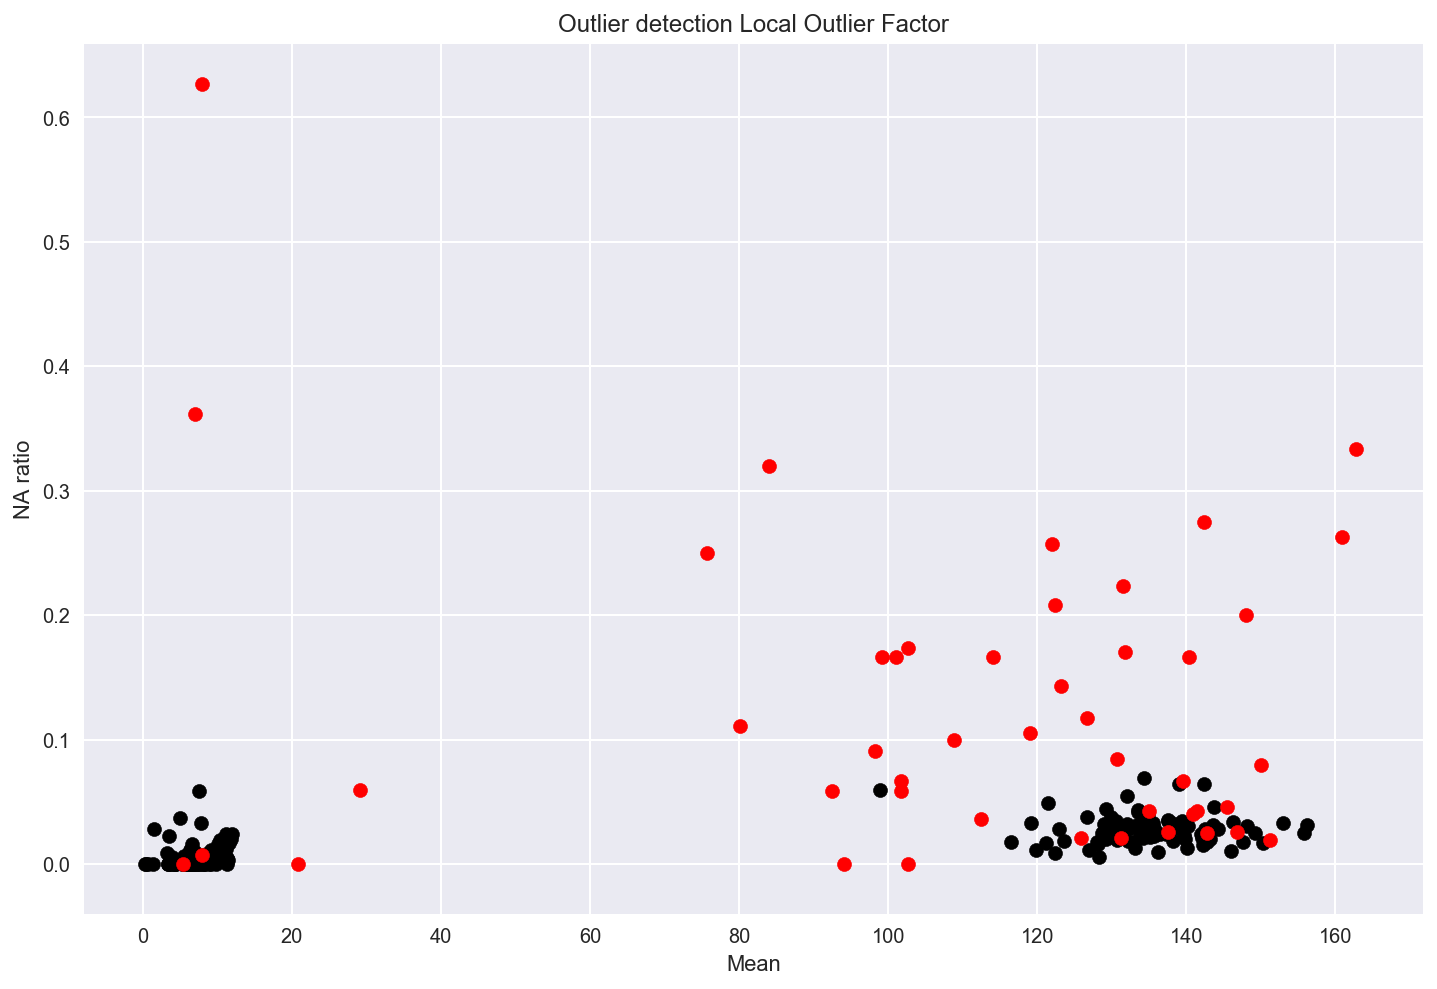

In [19]:
df1_1 = df1[df1['outlier'] == 1][['mean','NA_ratio']]
X1 = df1_1.values
df1_2 = df1[df1['outlier'] == -1][['mean','NA_ratio']]
X2 = df1_2.values
plt.figure(1) 
plt.title("Outlier detection Local Outlier Factor")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.ylabel("NA ratio")
plt.xlabel("Mean")
plt.show()

In [30]:
df_i1 = df[df['ebs_mfg'] == 'Knorr Bremse'].reset_index(drop = True)
X1 = df_i1[['mean', 'max', 'std', 'kurt', 'skew', 'dif_mean', 'dif_max',
       'dif_std', 'NA_ratio', 'NA_ratio_dif']]
df_i2 = df[df['ebs_mfg'] == 'Haldex'].reset_index(drop = True)
X2 = df_i2[['mean', 'max', 'std', 'kurt', 'skew', 'dif_mean', 'dif_max',
       'dif_std', 'NA_ratio', 'NA_ratio_dif']]

In [31]:
clf1 = IsolationForest(contamination=0.2, max_features = 10)
clf1.fit(X1.values)
y_pred1 = clf.predict(X1.values)

In [33]:
df_i1['outlier'] = y_pred1

In [34]:
clf2 = IsolationForest(contamination=0.2, max_features = 10)
clf2.fit(X2.values)
y_pred2 = clf.predict(X2.values)

In [35]:
df_i2['outlier'] = y_pred2

In [38]:
df1 = pd.concat([df_i1,df_i2]).reset_index(drop = True)

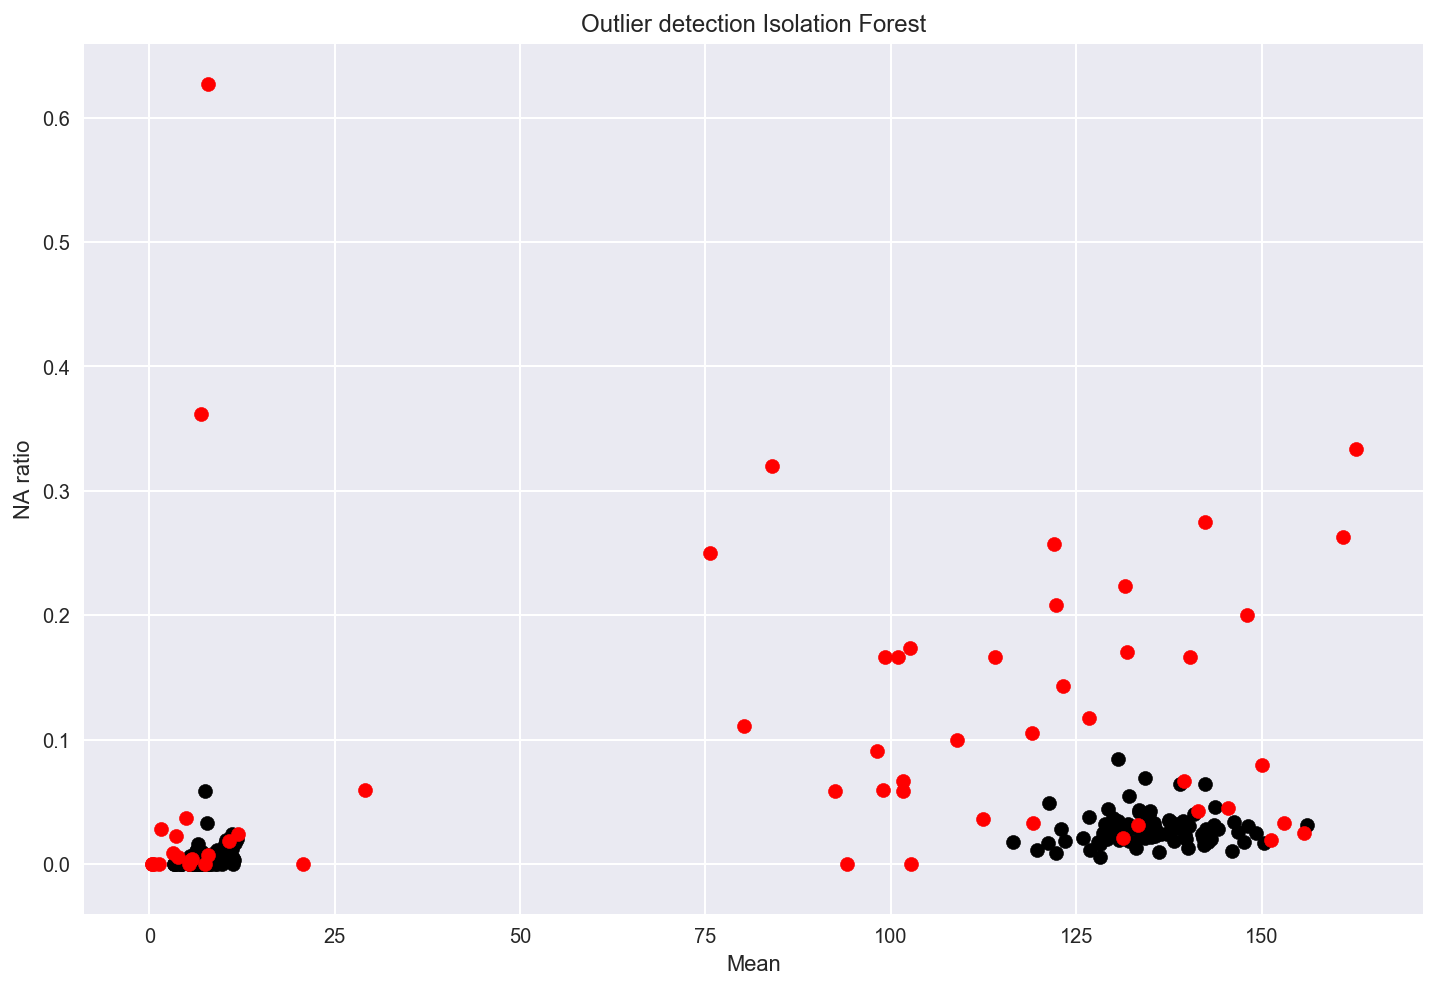

In [40]:
df1_1 = df1[df1['outlier'] == 1][['mean','NA_ratio']]
X1 = df1_1.values
df1_2 = df1[df1['outlier'] == -1][['mean','NA_ratio']]
X2 = df1_2.values
plt.figure(1) 
plt.title("Outlier detection Isolation Forest")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
plt.scatter(X2[:, 0], X2[:, 1], color='red')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.ylabel("NA ratio")
plt.xlabel("Mean")
plt.show()